In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

import seaborn as sns

KaggleのNotebooks  
「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有


# データセットの準備
アイオワ州エイムズ市の住宅価格データセット  
住宅に関する79種類もの説明変数→価格  
[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## 【問題1】データセットの取得

In [4]:
#@@@ csvファイルの読み込み
# アイオワ州エイムズ市の住宅価格データセット
folder = '/content/drive/MyDrive/Colab Notebooks/D-lab/deta/'
file = 'AmesIowahouse_Train.csv'
csv_path = folder + file
np.set_printoptions(suppress=True) # suppress：指数表示→小数表記
df = pd.read_csv(csv_path)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


## 【問題2】データセット自体の調査

|項目|内容|
|:--|:--|
|SalePrice|プロパティの販売価格 (ドル単位)。これは、予測しようとしているターゲット変数です。|
|MSSubClass|建物クラス|
|MSZoning|一般的なゾーニング分類|
|LotFrontage|プロパティに接続された道路の直線フィート|
|LotArea|ロットサイズ (平方フィート)|
|Street|アクセス道路の種類|
路地|路地アクセスの種類
|LotShape|プロパティの一般的な形状|
|LandContour|プロパティの平坦度|
ユーティリティ|利用可能なユーティリティの種類
|LotConfig|ロット構成|
|LandSlope|プロパティの勾配|
近所|エイムズ市の境界内の物理的な場所
|条件1|幹線道路または鉄道に近接|
|条件 2|幹線道路または鉄道に近い (秒が存在する場合)|
|BldgType|住居のタイプ|
|HouseStyle|住まいのスタイル|
|OverallQual|全体的な素材と仕上げの品質|
|OverallCond|総合的なコンディション評価|
|YearBuilt|元の建設日|
|YearRemodAdd|改造日|
|RoofStyle|屋根のタイプ|
|RoofMatl|屋根材|
|Exterior1st|家の外装材|
|Exterior2nd|家の外装材 (複数の素材の場合)|
|MasVnrType|組積造単板タイプ|
|MasVnrArea|石積みベニヤ面積 (平方フィート)|
|ExterQual|外装材の品質|
|ExterCond|外装の素材の現状|
|Foundation|ファンデーションの種類|
|BsmtQual|地下室の高さ|
|BsmtCond|地下室の一般的な状態|
|BsmtExposure|ストライキまたは庭レベルの地下の壁|
|BsmtFinType1|地下仕上げエリアの品質|
|BsmtFinSF1|タイプ 1 仕上げ平方フィート|
|BsmtFinType2|2 番目の仕上げ領域の品質 (存在する場合)|
|BsmtFinSF2|タイプ 2 仕上げ平方フィート|
|BsmtUnfSF|地下室の未完成の平方フィート|
|TotalBsmtSF|地下室の総平方フィート|
暖房|暖房の種類
|HeatingQC|暖房の質と状態|
|CentralAir|中央空調|
電気|電気系統
|1stFlrSF|1 階の平方フィート|
|2ndFlrSF|2 階の平方フィート|
|LowQualFinSF|低品質仕上げ平方フィート (全フロア)|
|GrLivArea|地上 (地面) のリビング エリアの平方フィート|
|BsmtFullBath|地下フルバスルーム|
|BsmtHalfBath|地下ハーフバスルーム|
|FullBath|グレード以上のフルバスルーム|
|HalfBath|地上半身浴|
寝室|地下1階以上の寝室の数
キッチン|キッチンの数
|KitchenQual|キッチンクオリティ|
|TotRmsAbvGrd|地上の部屋の合計 (バスルームは含まない)|
機能的|家の機能性評価
暖炉|暖炉の数
|FireplaceQu|暖炉の品質|
|GarageType|ガレージの場所|
|GarageYrBlt|ガレージが建てられた年|
|GarageFinish|ガレージの内装仕上げ|
|GarageCars|車の容量でのガレージのサイズ|
|GarageArea|ガレージの面積 (平方フィート)|
|GarageQual|ガレージ品質|
|GarageCond|ガレージの状態|
|PavedDrive|舗装された私道|
|WoodDeckSF|ウッドデッキ面積 (平方フィート)|
|OpenPorchSF|オープン ポーチ エリア (平方フィート)|
|EnclosedPorch|囲まれたポーチの面積 (平方フィート)|
|3SsnPorch|3 シーズンのポーチ面積 (平方フィート)|
|ScreenPorch|スクリーン ポーチの面積 (平方フィート)|
|PoolArea|プール面積 (平方フィート)|
|PoolQC|プールの品質|
フェンス|フェンスの品質
|MiscFeature|他のカテゴリに含まれていないその他の機能|
|MiscVal|その他の機能の値|
|MoSold|販売月|
|YrSold|販売年|
|SaleType|販売の種類|
販売条件|販売条件

# データの概観

## 【問題3】データの確認

In [5]:
# データの形状
df.shape

(1460, 81)

In [6]:
# データの状態
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# データ重複確認　true：重複
df.duplicated(keep=False).value_counts()

False    1460
dtype: int64

In [8]:
# 特徴量：X
X = df.drop("SalePrice",axis=1)
X.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [9]:
# 目標値：ｔ
t = df["SalePrice"]
t.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

### 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [10]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [11]:
# カテゴリカル変数を含んだデータのみを抽出 object：string含む
X_obj = X.select_dtypes(include='object')
print(f'文字データ数{len(X_obj.columns)}')
print(f'文字データ{X_obj.columns}')

文字データ数43
文字データIndex(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


### 今回の目的変数はどの列か確認する。

>SalePrice	プロパティの販売価格 (ドル単位)。これは、予測しようとしているターゲット変数です。

In [12]:
df['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [13]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## 【問題4】欠損値への対応

### 各特徴量の欠損値の有無を確認する。

In [14]:
import missingno as msno
%matplotlib inline

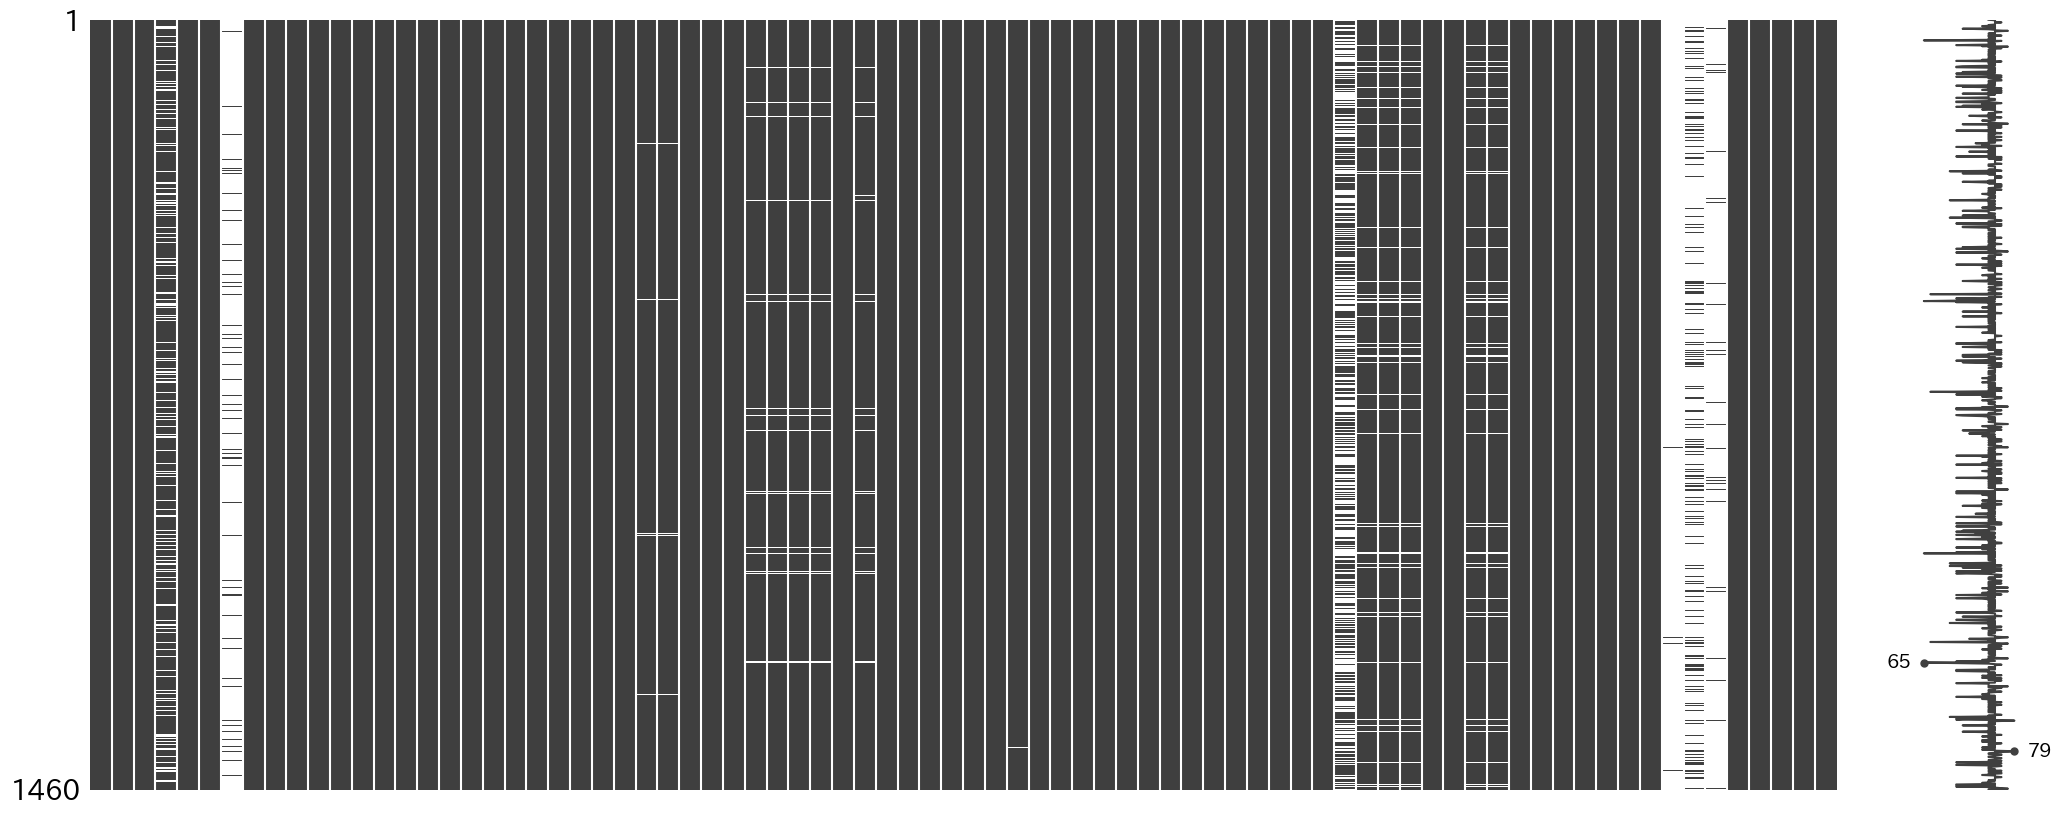

In [15]:
# 欠損値がデータ全体のどこに分布
msno.matrix(X)
plt.show()

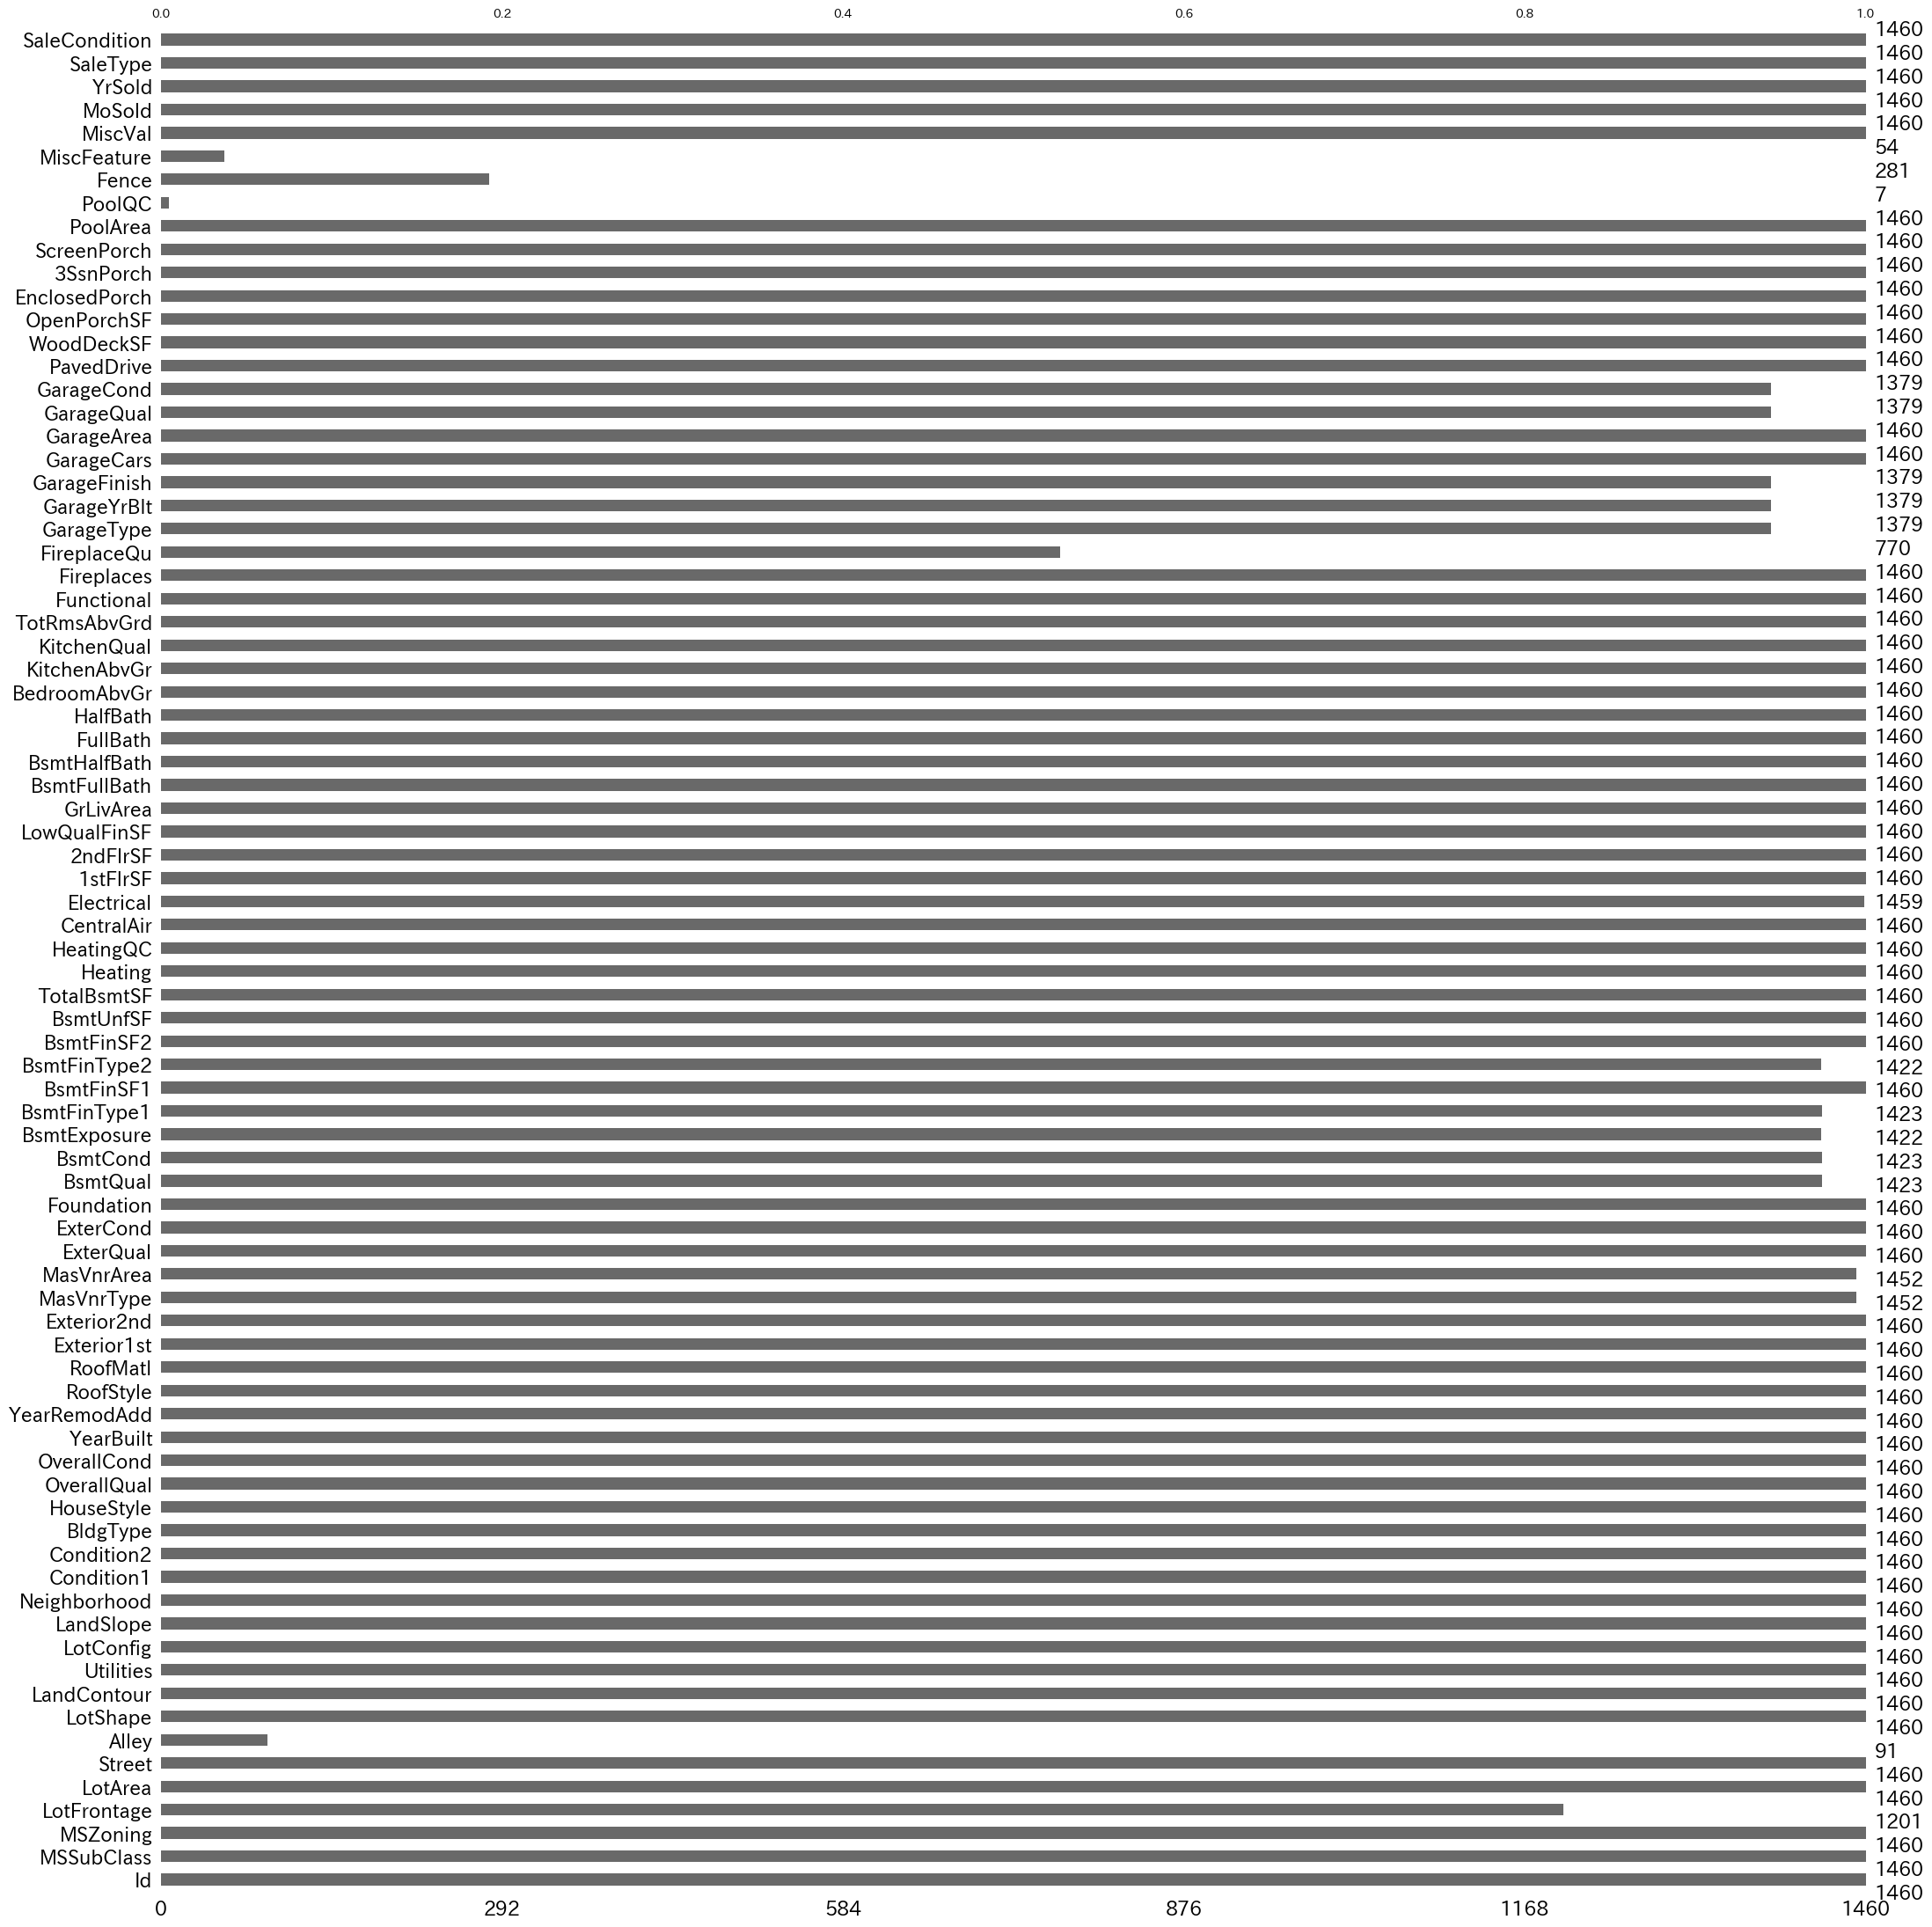

In [16]:
# 各特徴量でどれくらい欠損値があるのか
msno.bar(X)
plt.show()

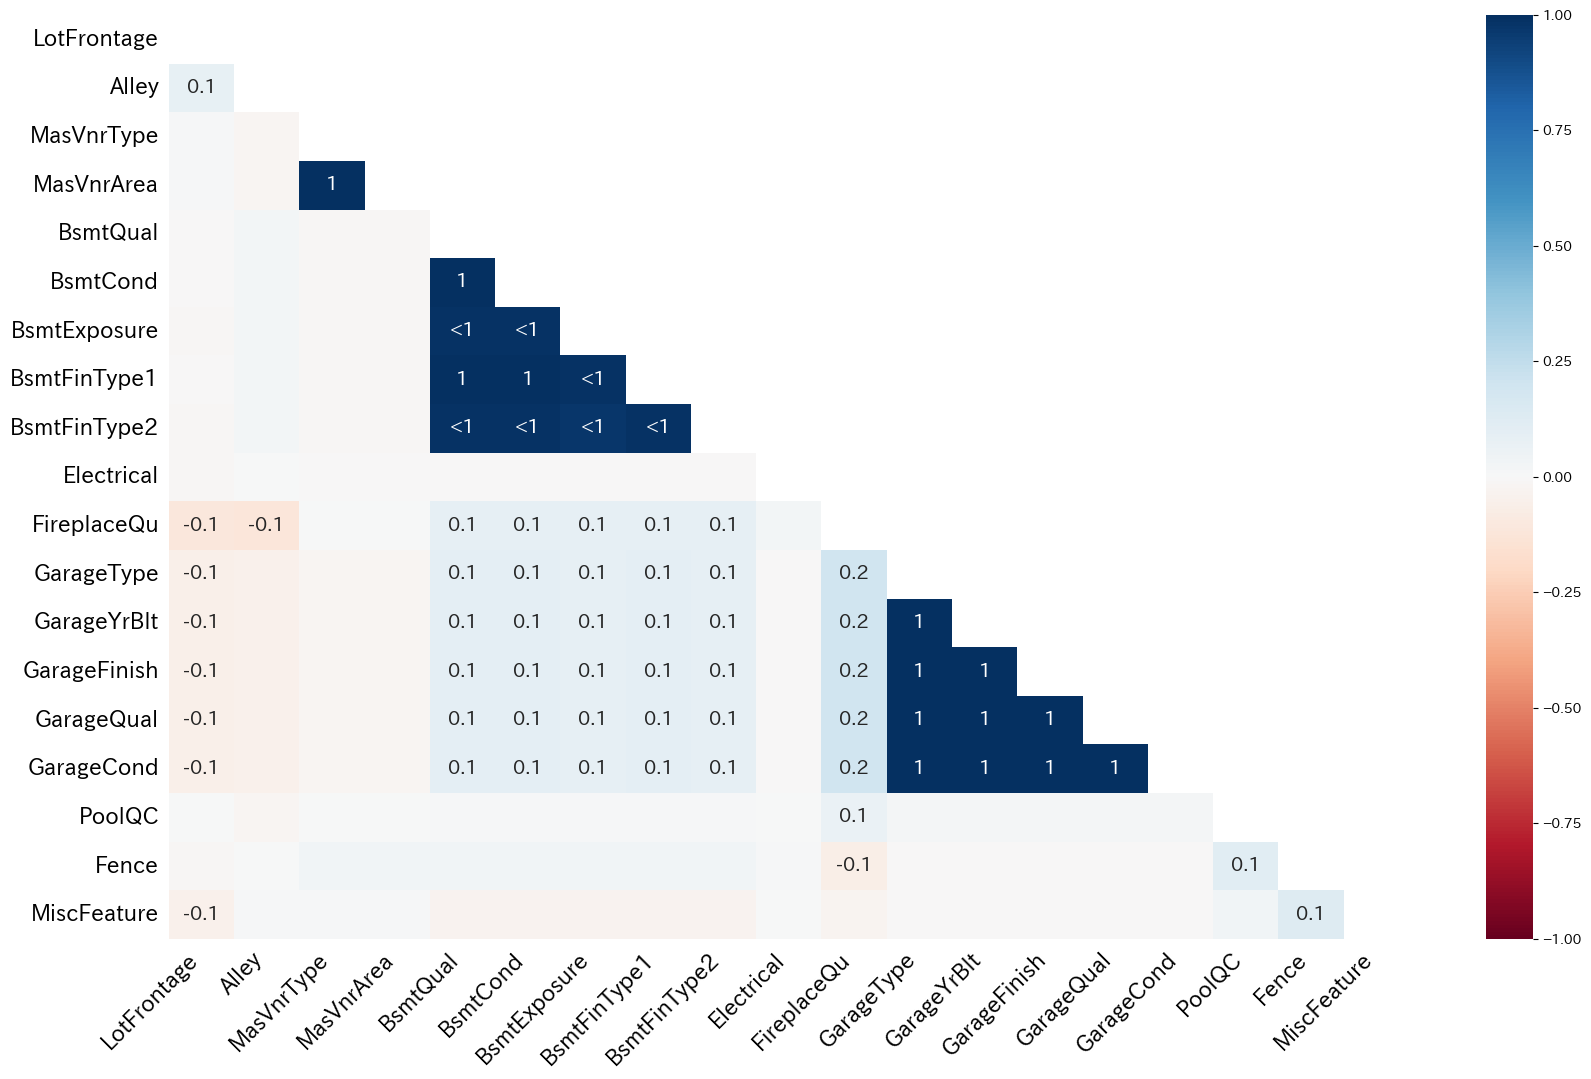

In [17]:
# 欠損値における特徴量間の相関度
msno.heatmap(X)
plt.show()

### 欠損値が何パーセント含まれるかを確認する。

In [18]:
X_null=X.isnull().sum()*100/len(X)
X_null = pd.DataFrame([X_null],index=['missing_ratio']).T
X_null.insert(0, 'Total', 1460)
X_null
# X_nullP = X_null[X_null['missing_ratio']>0]
# X_nullP

,Total,missing_ratio
Id,1460,0.000000
MSSubClass,1460,0.000000
MSZoning,1460,0.000000
LotFrontage,1460,17.739726
LotArea,1460,0.000000
...,...,...
MiscVal,1460,0.000000
MoSold,1460,0.000000
YrSold,1460,0.000000
SaleType,1460,0.000000


### 5つ以上欠損値がある特徴量（列）は削除する。

In [19]:
# 欠損値が5以上
X_null5=X.isnull().sum()
X_null5 = pd.DataFrame([X_null5],index=['missing_ratio']).T
X_null5.insert(0, 'Total', 1460)
X_null5 = X_null5[X_null5['missing_ratio']>=5]
X_null5

,Total,missing_ratio
LotFrontage,1460,259
Alley,1460,1369
MasVnrType,1460,8
MasVnrArea,1460,8
BsmtQual,1460,37
BsmtCond,1460,37
BsmtExposure,1460,38
BsmtFinType1,1460,37
BsmtFinType2,1460,38
FireplaceQu,1460,690


In [20]:
# 欠損値が5以下0以上
X_not5 = X_null[(X_null['missing_ratio']<=5)&(X_null['missing_ratio']>0)]
X_not5

,Total,missing_ratio
MasVnrType,1460,0.547945
MasVnrArea,1460,0.547945
BsmtQual,1460,2.534247
BsmtCond,1460,2.534247
BsmtExposure,1460,2.602740
BsmtFinType1,1460,2.534247
BsmtFinType2,1460,2.602740
Electrical,1460,0.068493


In [21]:
# 列：欠損値5以下　削除
Xdrop_y=X.dropna(thresh=1455,axis=1) 
# 確認
Xcheck=Xdrop_y.isnull().sum()
Xcheck[Xcheck>0]

Electrical    1
dtype: int64

### 5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。

In [22]:
Xdrop=Xdrop_y.dropna() 
Xdrop

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [23]:
Xcheck=Xdrop.isnull().sum()
Xcheck[Xcheck>0]

Series([], dtype: int64)

# 目的変数

## 【問題5】用語の調査

尖度(せんど)：分布のとがり具合、裾の重さ（広がり）の指標  
歪度(わいど)：分布の歪みの指標であり、分布が左右対称であるかどうか

## 【問題6】分布の確認

seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

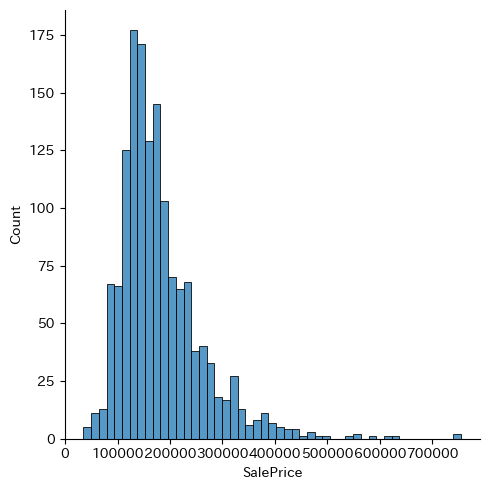

In [40]:
sns.displot(t)
plt.show()

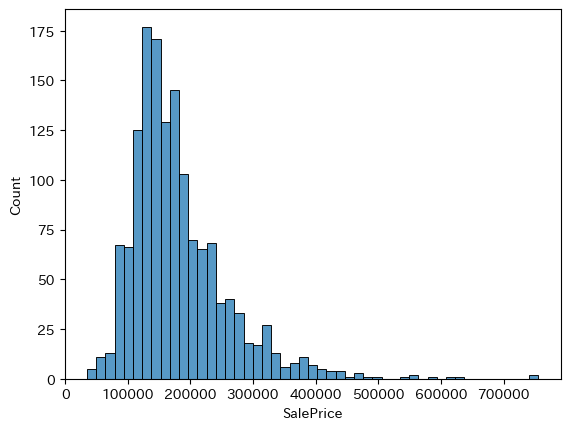

In [41]:
sns.histplot(t)
plt.show()

In [42]:
#分散
var = t.var() 
#尖度
kurt = t.kurt() 
#歪度
skew = t.skew() 
print(f'分散:{var}　尖度:{kurt}　歪度:{skew}')

分散:6311111264.297448　尖度:6.536281860064529　歪度:1.8828757597682129


目的変数に対して対数変換を行う

In [30]:
t_log = np.log10(t + 1)

対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

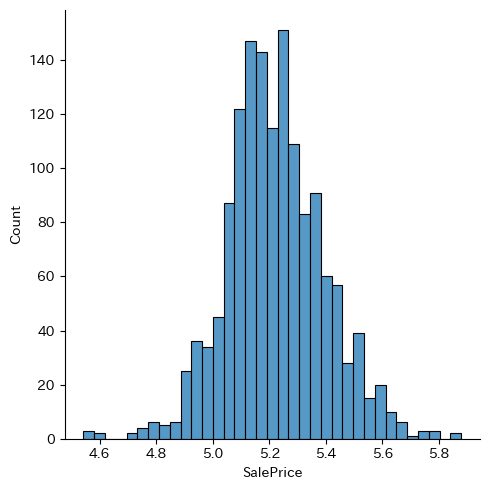

In [31]:
sns.displot(t_log)
plt.show()

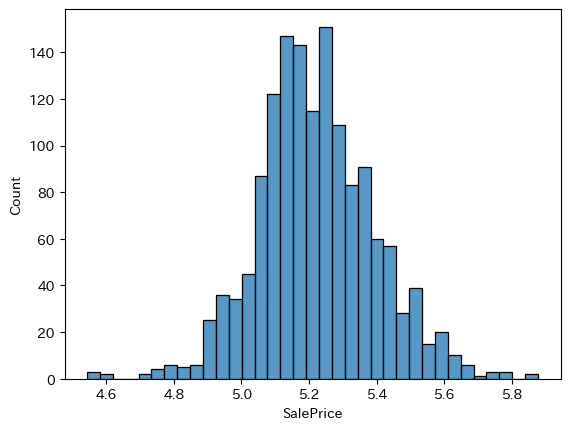

In [32]:
sns.histplot(t_log)
plt.show()

# 特徴量

## 【問題7】相関係数の確認

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [38]:
corr_mat = df.corr(method='pearson')
corr_mat 

<ipython-input-38-a1536f6e7fc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr(method='pearson')


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


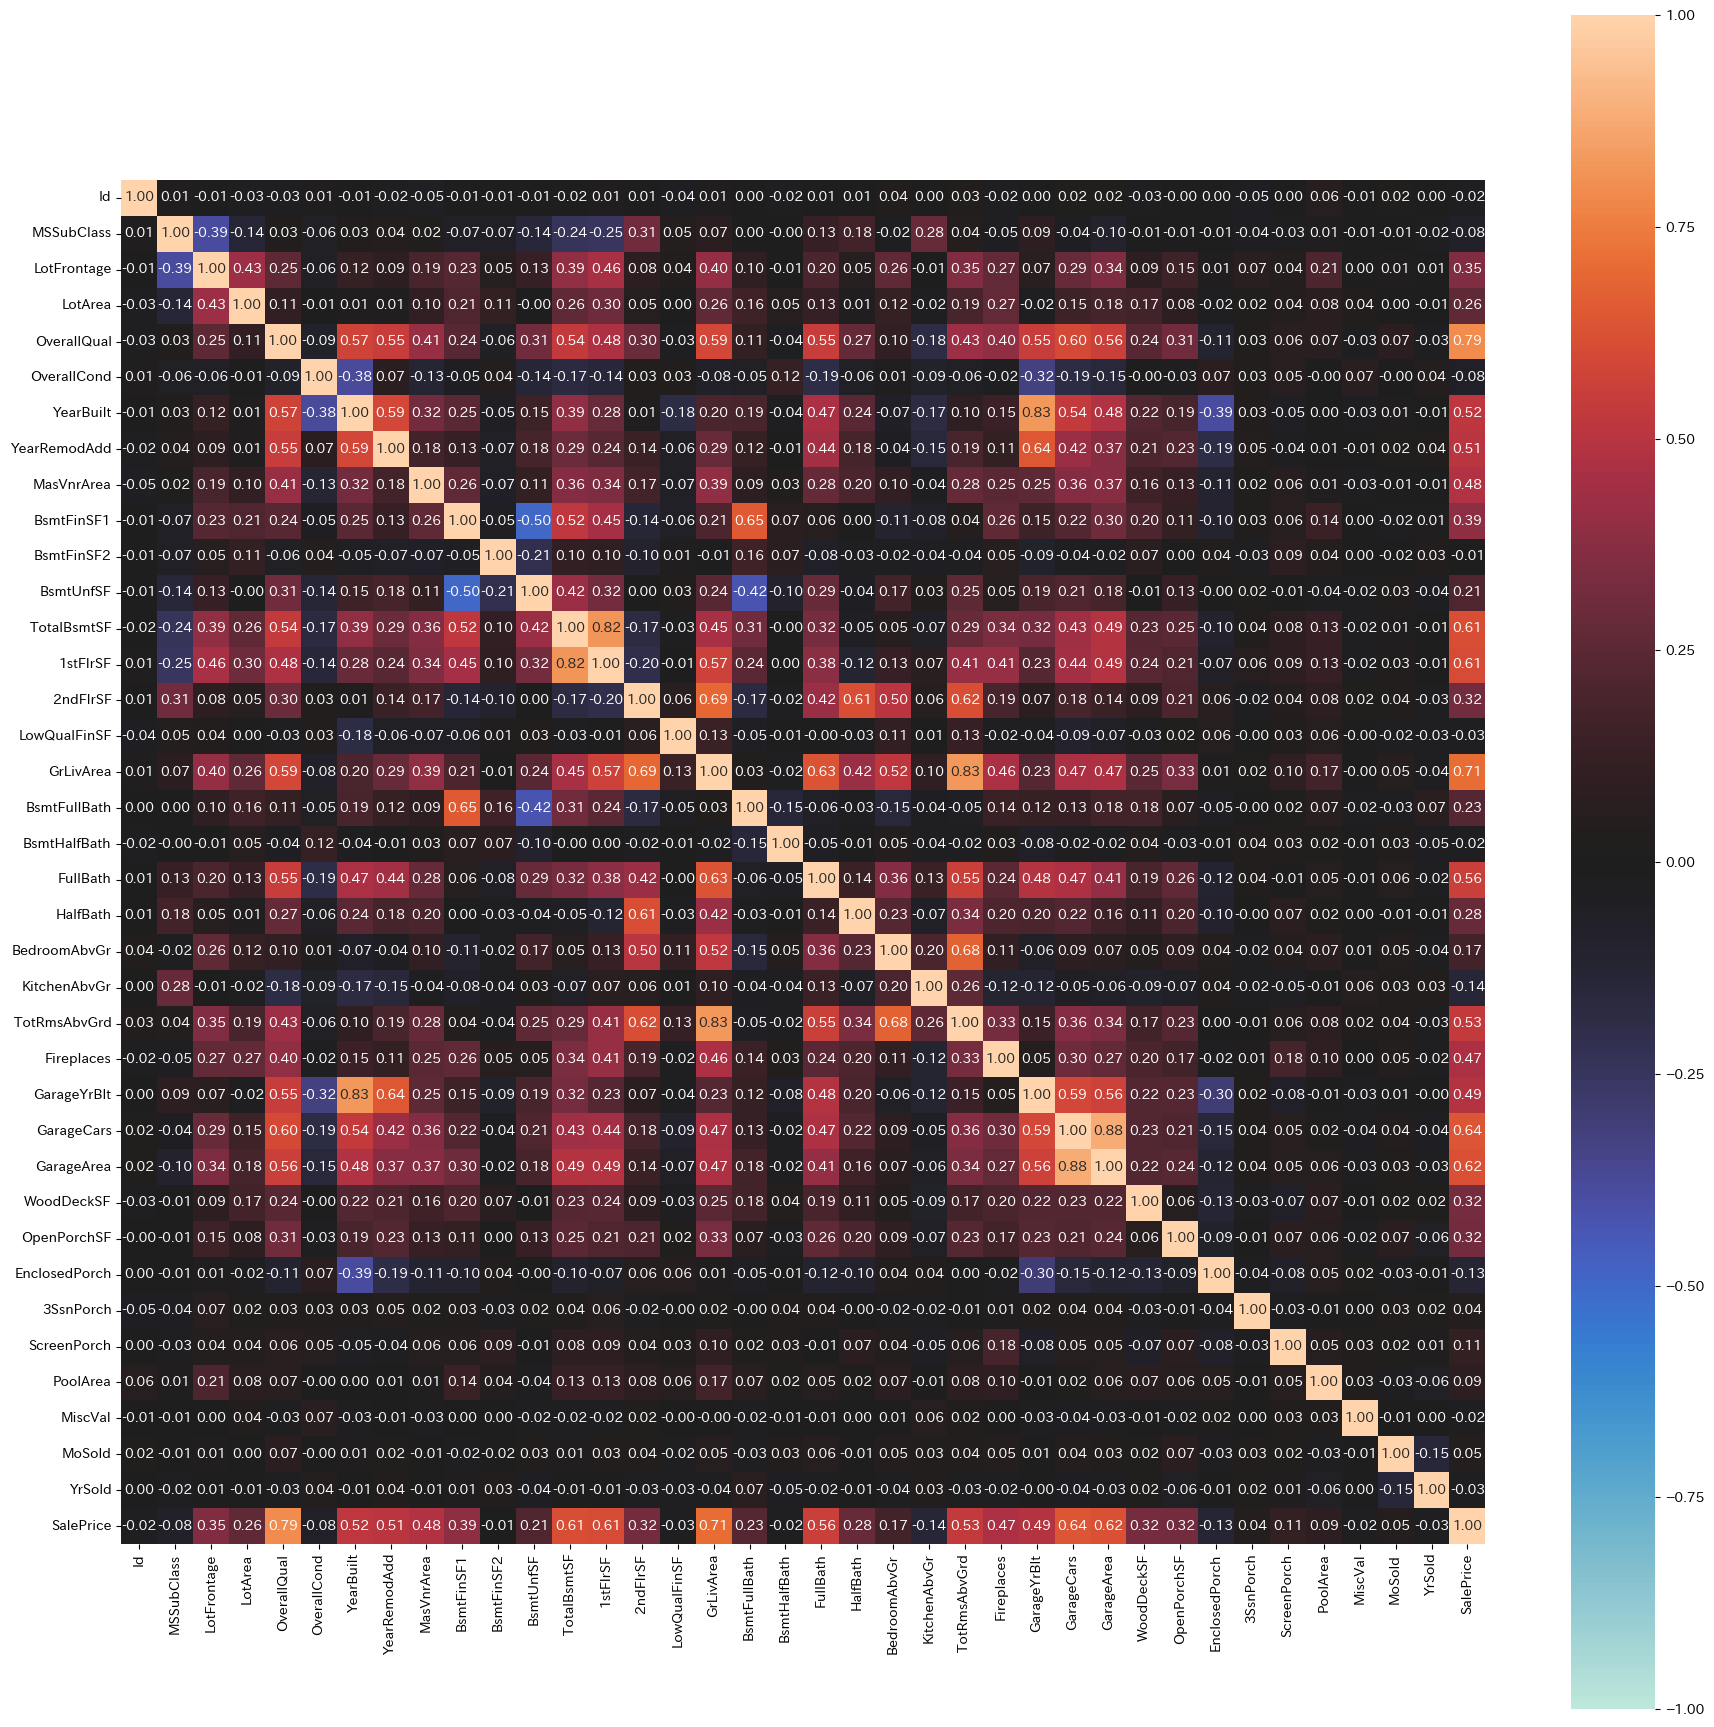

In [47]:
fig, ax = plt.subplots(figsize=(22, 22)) 
sns.heatmap(corr_mat, square=True, vmax=1, vmin=-1, center=0,annot=True, fmt='.2f')
plt.show()

**相関係数**  
0.88：「GarageArea、GarageCars」※一番高い  
0.83：「YearBuilt、GarageYrBlt」「GrLivArea、TotRmsAbvGrd」
0.82：「TotalBsmtSF、1stFlrSF」

目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [71]:
corr_mat.sort_values('SalePrice') ['SalePrice']
corr_index = list(abs(corr_mat ['SalePrice']).sort_values(ascending=False)[1:11].index)
df_10 = df[corr_index]

In [72]:
corr_10mat = df_10.corr(method='pearson')
corr_10mat 

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


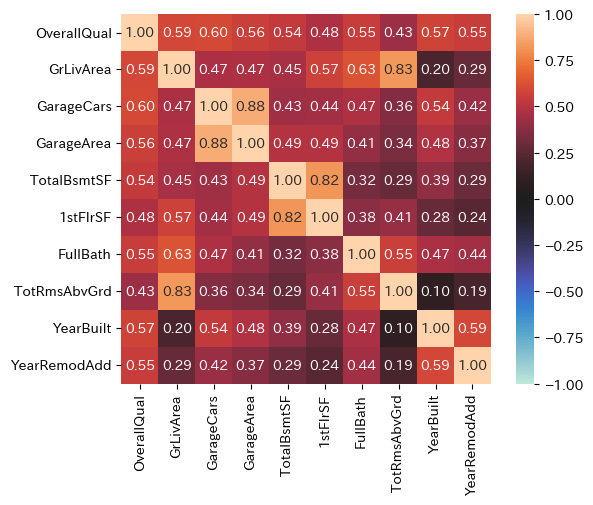

In [75]:
sns.heatmap(corr_10mat, square=True, vmax=1, vmin=-1, center=0,annot=True, fmt='.2f')
plt.show()

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual : 全体的な素材と仕上げの品質  
GrLivArea : 地上 (地面) のリビング エリアの平方フィート  
GarageCars : 車の容量でのガレージのサイズ  
GarageArea : ガレージの面積 (平方フィート)  
TotalBsmtSF : 地下室の総平方フィート  
1stFlrSF : 1 階の平方フィート  
FullBath : グレード以上のフルバスルーム  
TotRmsAbvGrd : 地上の部屋の合計 (バスルームは含まない)  
YearBuilt : 元の建設日  
YearRemodAdd : 改造日

選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

**相関係数**  
0.88：「GarageArea、GarageCars」  
0.83：「YearBuilt、GarageYrBlt」「GrLivArea、TotRmsAbvGrd」